In [50]:
import pandas as pd
from matplotlib import pyplot as plt
# set the max columns to none
pd.set_option('display.max_columns', None)

## Understanding The Data

[Link to data dictionary](https://livenjcu-my.sharepoint.com/:x:/r/personal/cperez13_njcu_edu/_layouts/15/Doc.aspx?sourcedoc=%7B2BAF01E9-E6E6-47A0-ACDC-A96C41B35F5E%7D&file=NYPD_Arrest_Historic_DataDictionary.xlsx&action=default&mobileredirect=true&login_hint=cperez13%40njcu.edu&ct=1668116724494&wdOrigin=OFFICECOM-WEB.START.UPLOAD&cid=48df1554-97b5-43e5-b41e-66ba01ed25dd)



Goal: 
    Within each borough what is the distribution of race for crime
    Plot in a bar chart

In [28]:
df = pd.read_csv('data/Crime Stats/NYPD_Arrests_Data__Historic_.csv', nrows = 1000000)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ARREST_KEY         1000000 non-null  int64  
 1   ARREST_DATE        1000000 non-null  object 
 2   PD_CD              999765 non-null   float64
 3   PD_DESC            997011 non-null   object 
 4   KY_CD              997011 non-null   float64
 5   OFNS_DESC          997011 non-null   object 
 6   LAW_CODE           999882 non-null   object 
 7   LAW_CAT_CD         993438 non-null   object 
 8   ARREST_BORO        1000000 non-null  object 
 9   ARREST_PRECINCT    1000000 non-null  int64  
 10  JURISDICTION_CODE  999994 non-null   float64
 11  AGE_GROUP          999983 non-null   object 
 12  PERP_SEX           1000000 non-null  object 
 13  PERP_RACE          1000000 non-null  object 
 14  X_COORD_CD         999999 non-null   float64
 15  Y_COORD_CD         999999 non-nul

In [40]:
df['PERP_RACE'].replace({'WHITE HISPANIC' : 'HISPANIC' }, inplace = True)
df['PERP_RACE'].replace({'BLACK HISPANIC' : 'HISPANIC' }, inplace = True)

df.head(50)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,236791704,11/22/2021,581.0,NaN,NaN,NaN,PL 2225001,M,M,28,0.0,45-64,M,BLACK,997427.0,230378.0,40.799009,-73.952409,POINT (-73.95240854099995 40.799008797000056)
1,237354740,12/04/2021,153.0,RAPE 3,104.0,RAPE,PL 1302502,F,B,41,0.0,25-44,M,HISPANIC,1013232.0,236725.0,40.816392,-73.895296,POINT (-73.89529641399997 40.816391847000034)
2,236081433,11/09/2021,681.0,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,M,Q,113,0.0,25-44,M,BLACK,1046367.0,186986.0,40.679700,-73.776047,POINT (-73.77604736799998 40.67970040800003)
3,32311380,06/18/2007,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,Q,27,1.0,18-24,M,BLACK,NaN,NaN,NaN,NaN,NaN
4,192799737,01/26/2019,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,M,25,0.0,45-64,M,BLACK,1000555.0,230994.0,40.800694,-73.941109,POINT (-73.94110928599997 40.800694331000045)
5,193260691,02/06/2019,NaN,NaN,NaN,NaN,PL 2203400,F,M,14,0.0,25-44,M,UNKNOWN,986685.0,215375.0,40.757839,-73.991212,POINT (-73.99121211099998 40.75783900300007)
6,237291769,12/03/2021,579.0,NaN,NaN,NaN,PL 2224001,F,Q,115,0.0,25-44,M,BLACK,1018534.0,220579.0,40.772056,-73.876224,POINT (-73.87622400099998 40.77205649600006)
7,236106641,11/10/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,B,41,72.0,25-44,M,HISPANIC,1017934.0,232221.0,40.804013,-73.878332,POINT (-73.87833183299993 40.804012949000025)
8,238383628,12/28/2021,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1702500,F,Q,113,0.0,18-24,M,BLACK,1045482.0,191341.0,40.691660,-73.779199,POINT (-73.77919852099996 40.69166001700007)
9,149117452,01/06/2016,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,67,0.0,25-44,M,BLACK,998032.0,175598.0,40.648650,-73.950336,POINT (-73.95033556299995 40.648650085000035)


In [41]:
# Borough codes

class Codes:
    def __init__(self):
        self.BRONX = 'B'
        self.STATEN_ISLAND = 'S'
        self.BROOKLYN = 'K'
        self.MANHATTAN = 'M'
        self.QUEENS = 'Q'
        
codes = Codes()

class Boro:
    def __init__(self, code, name, population, crime_population):
        self.code = code
        self.name = name
        self.population = population
        self.crime_population = crime_population
        
        self.male_rate = -1
        self.female_rate = -1
        
        self.white_crime_rate = -1
        self.black_crime_rate = -1
        self.asian_crime_rate = -1
        self.hispanic_crime_rate = -1
        
        self.white_crime_count = -1
        self.black_crime_count = -1
        self.asian_crime_count = -1
        self.hispanic_crime_count = -1
    

races = [
    'WHITE',
    'BLACK',
    'HISPANIC',
    'ASIAN / PACIFIC ISLANDER',
]        
        
def calc_crime_population(boro_code):
    return len(df[df['ARREST_BORO'] == boro_code])

boroughs = [
    Boro(codes.BRONX, 'Bronx', 9806, calc_crime_population(codes.BRONX)),
    Boro(codes.BROOKLYN, 'Brooklyn', 24184, calc_crime_population(codes.BROOKLYN)),
    Boro(codes.MANHATTAN, 'Manhattan', 9065, calc_crime_population(codes.MANHATTAN)),
    Boro(codes.QUEENS, 'Queens', 21198, calc_crime_population(codes.QUEENS)),
    Boro(codes.STATEN_ISLAND, 'Staten Island', 4020, calc_crime_population(codes.STATEN_ISLAND))   
]

        
def calc_race_crime_rate(boro, race):
    num_crime_race = len(df[(df['PERP_RACE'] == race) & (df['ARREST_BORO'] == boro.code)])
    return (num_crime_race/boro.crime_population)
    
    
crimeR = calc_race_crime_rate(boroughs[3], races[0])
print(crimeR)



0.12565331759962634


In [42]:
crime_composition = {
        'Boro': [],
        'Race': [],
        'Percentage': []}

race_comp_df = pd.DataFrame(crime_composition)


for i in range(len(boroughs)):
    curr_boro = boroughs[i]
    for j in range(len(races)):
        curr_race = races[j]
        race_comp_df = race_comp_df.append({'Boro': curr_boro.name, 'Race': curr_race, 'Percentage' : calc_race_crime_rate(curr_boro, curr_race)}, ignore_index = True)

        
print(race_comp_df)

             Boro                      Race  Percentage
0           Bronx                     WHITE    0.037828
1           Bronx                     BLACK    0.464810
2           Bronx                  HISPANIC    0.476164
3           Bronx  ASIAN / PACIFIC ISLANDER    0.011770
4        Brooklyn                     WHITE    0.125932
5        Brooklyn                     BLACK    0.599962
6        Brooklyn                  HISPANIC    0.231925
7        Brooklyn  ASIAN / PACIFIC ISLANDER    0.035151
8       Manhattan                     WHITE    0.135095
9       Manhattan                     BLACK    0.483521
10      Manhattan                  HISPANIC    0.333544
11      Manhattan  ASIAN / PACIFIC ISLANDER    0.037232
12         Queens                     WHITE    0.125653
13         Queens                     BLACK    0.387202
14         Queens                  HISPANIC    0.342764
15         Queens  ASIAN / PACIFIC ISLANDER    0.128397
16  Staten Island                     WHITE    0

In [55]:
def show_crime_dist(boro):
    boro_select = race_comp_df[race_comp_df['Boro'] == boro.name]
    
    race = boro_select['Race']
    rate = boro_select['Percentage']

    # Figure Size
    fig = plt.figure(figsize =(10, 7))

    # Horizontal Bar Plot
    plt.bar(race, rate)

    plt.xlabel("Race")
    plt.ylabel("Percentage")
    plt.title("Crime Distribution for " + boro.name + " by Race")
    
    # Show Plot
    plt.show()
    


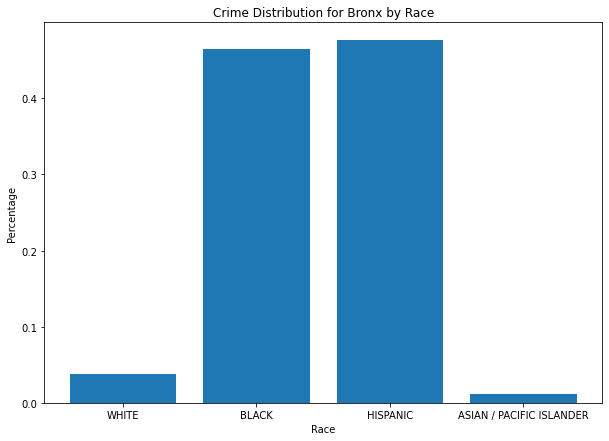

In [60]:
show_crime_dist(boroughs[0])